In [1]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:

# -------------------------------
# 2. Load Dataset
# -------------------------------
# Download Walmart Sales Dataset from Kaggle and place in same folder
df = pd.read_csv("Walmart.csv")

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (6435, 8)
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [4]:
# -------------------------------
# 3. Data Preprocessing
# -------------------------------
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True ,errors='coerce')

# Extract useful features (time-based)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Create lag feature (previous week's sales)
df['Lag_1'] = df['Weekly_Sales'].shift(1)
df['Lag_2'] = df['Weekly_Sales'].shift(2)

# Drop missing values after lagging
df = df.dropna()

print(df.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   
5      1 2010-03-12    1439541.59             0        57.79       2.667   
6      1 2010-03-19    1472515.79             0        54.58       2.720   

          CPI  Unemployment  Year  Month  Week       Lag_1       Lag_2  
2  211.289143         8.106  2010      2     7  1641957.44  1643690.90  
3  211.319643         8.106  2010      2     8  1611968.17  1641957.44  
4  211.350143         8.106  2010      3     9  1409727.59  1611968.17  
5  211.380643         8.106  2010      3    10  1554806.68  1409727.59  
6  211.215635         8.106  2010      3    11  1439541.59  1554806.68  


In [5]:



# -------------------------------
# 4. Feature & Target
# -------------------------------
X = df[['Year', 'Month', 'Week', 'Lag_1', 'Lag_2']]
y = df['Weekly_Sales']

# -------------------------------
# 5. Train-Test Split (Time-aware)
# -------------------------------
split_index = int(len(df)*0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]





In [6]:
# -------------------------------
# 6. Train Regression Model
# -------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------
# 7. Predictions
# -------------------------------
y_pred = model.predict(X_test)



In [7]:
# -------------------------------
# 8. Evaluation
# -------------------------------
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 119348.45936901422
R2 Score: 0.9058914658004499


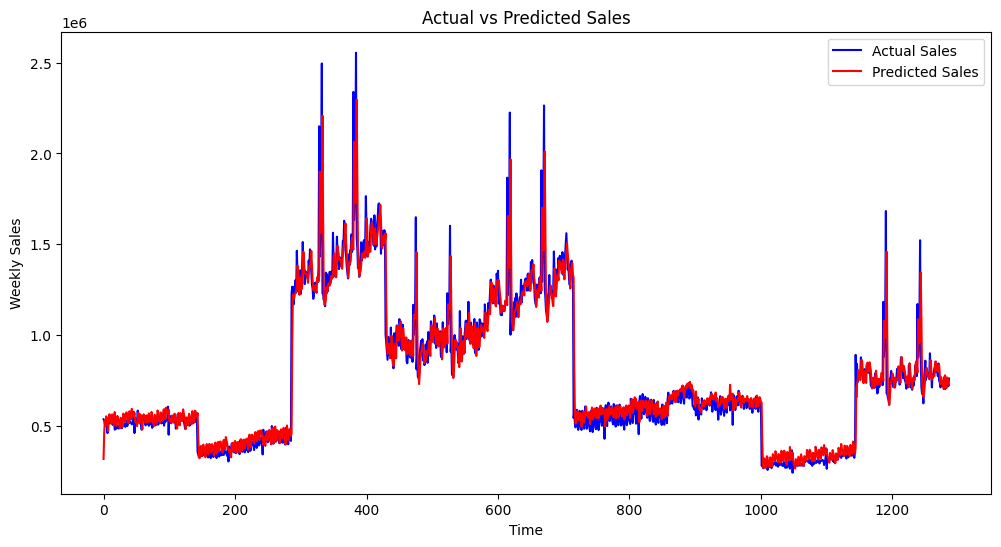

In [8]:
# -------------------------------
# 9. Plot Actual vs Predicted
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Sales", color="blue")
plt.plot(y_pred, label="Predicted Sales", color="red")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()